## Sand Shear Stresses and Compactability

### Investigating sand shear strength in the swash zone and along the upper beach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_path = '../Final_Data_Sets/'

data_path = '../Final_Data_Sets/'
data_file_name = 'PIBN_Bio_Env_NCDOT_CSI_2012-2020.csv'

plot_path = '../Final_Plots/'

In [3]:
def load_data(path, name):
    df_ = pd.read_csv(data_path+data_file_name)
    
    # create a new iso date time object field from existing sampling date:
    df_['iso_date'] = pd.to_datetime(df_['sample_date'])

    # to balance the design remove transects T-12 thru T-16 from the data:
    # we could have done this before the DOT to CSI label remapping but it would
    # have required additional code to detect the NT72,3,and 4 transects, too.
    df_.query("CSI_transect_ID != ['T12','T13','T14','T15','T16']", inplace=True)
    
    # create new survey field from existing sampling date:
    yr = df_['sample_date'].str[0:4]
    df_['year'] = yr
    mon = df_['sample_date'].str[5:7]
    df_['survey'] = mon+' '+yr
    
    # add shear strength aggregates for surface swash xone (0-3 inches) and mid-beach (average
    # over full 12 inches measured):
    
    df_['Shear_Strength_Swash'] = df_[['NCDOT_swc_0_3in','CSI_swc_1in']].mean(axis=1)
    df_['Shear_Strength_Midbeach'] = df_[['CSI_mbc_1in',
                                          'CSI_mbc_6in',
                                          'CSI_mbc_12in',
                                        ]].mean(axis=1)
    # Finally, since winter doesn't present much bio data we will choose to drop all winter surveys:
    df_.query("season != ['winter']", inplace=True)
    
    # Finally, finally, drop a few more or less redundant surveys to reduce the 'noise' in the data:
    df_.query("survey != ['08 2015']", inplace=True)
    df_.query("survey != ['08 2016']", inplace=True)
    
    # integrity checks:
    print('Integrity checks:')
    print('Transect list:', df_['CSI_transect_ID'].unique())
    print('Areas:', df_['area'].unique())
    print('Epochs', df_['epoch'].unique())
    print(df_['season'].unique())
    
    return( df_ )

In [4]:
df = load_data(data_path, data_file_name)
df

Integrity checks:
Transect list: ['C11' 'C09' 'C07' 'C05' 'C03' 'C01' 'T03' 'T05' 'T07' 'T09' 'T11' 'T01'
 'T02' 'T04' 'T06' 'T08' 'T10' 'C02' 'C04' 'C06' 'C08' 'C10']
Areas: ['Control' 'Treatment']
Epochs ['prenourishment' 'postnourishment']
['spring' 'summer' 'autumn']


,transect_id,sample_date,year,season,CSI_transect_ID,NCDOT_transect_ID,data_origin,area,epoch,epoch_II,...,sm_Emerita,md_Emerita,lg_Emerita,Donax,amphipods,worms,iso_date,survey,Shear_Strength_Swash,Shear_Strength_Midbeach
0,apr2012_C11,2012/04/17 00:00:00,2012,spring,C11,NT59,NCDOT,Control,prenourishment,prenourishment,...,0.0,0.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012,80.0,NaN
1,apr2012_C09,2012/04/17 00:00:00,2012,spring,C09,NT60,NCDOT,Control,prenourishment,prenourishment,...,0.0,0.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012,100.0,NaN
2,apr2012_C07,2012/04/17 00:00:00,2012,spring,C07,NT61,NCDOT,Control,prenourishment,prenourishment,...,0.0,1.0,0.0,0.0,1.0,0.0,2012-04-17,04 2012,140.0,NaN
3,apr2012_C05,2012/04/17 00:00:00,2012,spring,C05,NT62,NCDOT,Control,prenourishment,prenourishment,...,0.0,2.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012,100.0,NaN
4,apr2012_C03,2012/04/17 00:00:00,2012,spring,C03,NT63,NCDOT,Control,prenourishment,prenourishment,...,0.0,0.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,oct2020_T07,2020/10/14 00:00:00,2020,autumn,T07,NT69,CSI,Treatment,postnourishment,postnourishment_6yr,...,0.0,0.0,1.0,0.0,0.0,0.0,2020-10-14,10 2020,50.0,150.000000
853,oct2020_T08,2020/10/14 00:00:00,2020,autumn,T08,NaN,CSI,Treatment,postnourishment,postnourishment_6yr,...,0.0,0.0,0.0,0.0,0.0,0.0,2020-10-14,10 2020,0.0,66.666667
854,oct2020_T09,2020/10/14 00:00:00,2020,autumn,T09,NT70,CSI,Treatment,postnourishment,postnourishment_6yr,...,4.0,1.0,0.0,0.0,0.0,0.0,2020-10-14,10 2020,0.0,66.666667
855,oct2020_T10,2020/10/14 00:00:00,2020,autumn,T10,NaN,CSI,Treatment,postnourishment,postnourishment_6yr,...,2.0,0.0,0.0,0.0,0.0,0.0,2020-10-14,10 2020,24.9,133.333333


In [19]:
df_ = pd.read_csv(data_path+data_file_name)
    
df_['sample_date'].loc[(df_['sample_date'] >= '2016/01/01') & (df_['sample_date'] <= '2016/12/31')].unique()
yr = df_['sample_date'].str[0:4]
df_['year'] = yr
mon = df_['sample_date'].str[5:7]
df_['survey'] = mon+' '+yr
df_['survey'].unique()

array(['04 2012', '07 2012', '10 2012', '01 2013', '04 2013', '07 2013',
       '10 2013', '01 2014', '04 2014', '07 2014', '09 2014', '10 2014',
       '01 2015', '04 2015', '07 2015', '08 2015', '10 2015', '01 2016',
       '02 2016', '04 2016', '05 2016', '07 2016', '08 2016', '10 2016',
       '02 2017', '04 2017', '08 2017', '10 2017', '01 2018', '04 2018',
       '08 2018', '10 2018', '01 2019', '05 2019', '07 2019', '10 2019',
       '01 2020', '04 2020', '07 2020', '10 2020'], dtype=object)

''

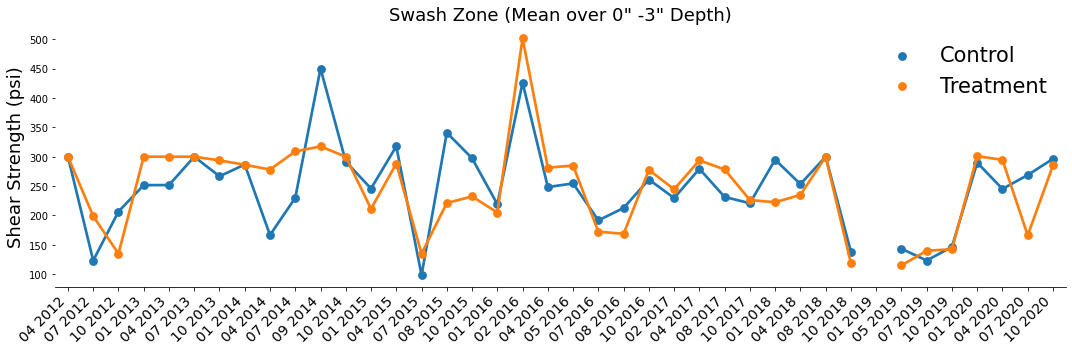

In [25]:
df_['Shear_Swash_Surface'] = df_[['NCDOT_swc_0_3in','CSI_swc_1in']].mean(axis=1)
df_['Shear_Swash_12'] = df_[['NCDOT_swc_9_12in','CSI_swc_12in']].mean(axis=1)

g = sns.catplot(x='survey', y='Shear_Swash_12', hue='area', data=df_, 
                kind='point',height=5, aspect=3.0, ci=None, capsize=0.1, legend=False)

g.set_axis_labels('', 'Shear Strength (psi)', size=18)
g.despine(left=True)
#g.set_yticklabels(['0','5','10','15','20','25','30'], size = 16)
#g.set_xticklabels('')
g.set_xticklabels(rotation=45, ha='right', fontsize=14)
    
plt.legend(loc='upper right', fontsize=21, frameon=False)
plt.title('Swash Zone (Mean over 0" -3" Depth)', fontsize=18, loc='center')
plt.tight_layout()

plt.savefig(plot_path+'Shear_Strength_swash_pointplot.png')
;

''

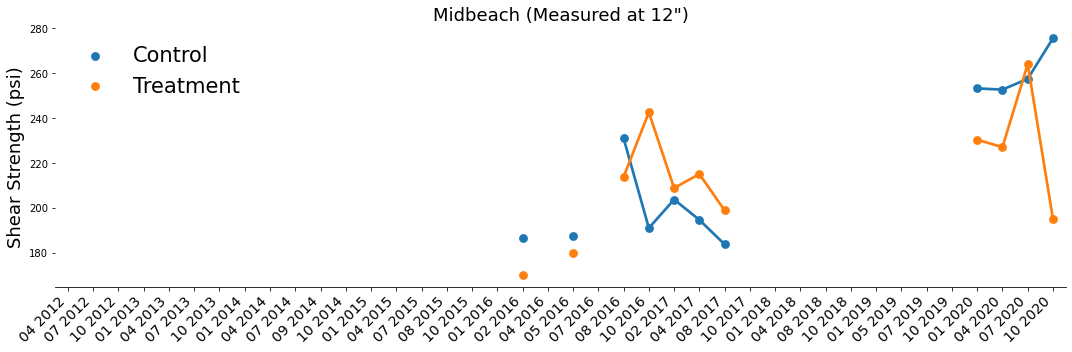

In [21]:
g = sns.catplot(x='survey', y='CSI_mbc_12in', hue='area', data=df_, 
                kind='point',height=5, aspect=3.0, ci=None, capsize=0.1, legend=False)

g.set_axis_labels('', 'Shear Strength (psi)', size=18)
g.despine(left=True)
#g.set_yticklabels(['0','5','10','15','20','25','30'], size = 16)
#g.set_xticklabels('')
g.set_xticklabels(rotation=45, ha='right', fontsize=14)
    
plt.legend(loc='upper left', fontsize=21, frameon=False)
plt.title('Midbeach (Measured at 12\")', fontsize=18, loc='center')
plt.tight_layout()

plt.savefig(plot_path+'Shear_Strength_midbeach_pointplot.png')
;

In [23]:
df['CSI_mbc_12in'].loc[df['CSI_mbc_12in'] >= 0].describe()

count    153.000000
mean     223.941176
std       73.699535
min       60.000000
25%      160.000000
50%      240.000000
75%      300.000000
max      301.000000
Name: CSI_mbc_12in, dtype: float64

In [17]:
print( 'Avg. Shear - Swash (psi):', df['Shear_Strength_Swash'].loc[df['epoch'] == 'prenourishment'].mean() )
print( 'Avg. Shear - Midbeach (psi):', df['Shear_Strength_Midbeach'].loc[df['epoch'] == 'postnourishment'].mean())

print('')
print( 'Swash - Minimum Shear Stress Recorded Pre (psi):', df['Shear_Strength_Swash'].loc[df['epoch'] == 'prenourishment'].min() )
print( 'Swash - Maximum Shear Stress Recorded Pre (psi):', df['Shear_Strength_Swash'].loc[df['epoch'] == 'prenourishment'].max() )

print( 'Swash - Minimum Shear Stress Recorded Post (psi):', df['Shear_Strength_Swash'].loc[df['epoch'] == 'postnourishment'].min() )
print( 'Swash - Maximum Shear Stress Recorded Post (psi):', df['Shear_Strength_Swash'].loc[df['epoch'] == 'postnourishment'].max() )
print('')
print( 'Mid-Beach - Minimum Shear Stress Recorded Pre (psi):', df['Shear_Strength_Midbeach'].loc[df['epoch'] == 'prenourishment'].min() )
print( 'Mid-Beach - Maximum Shear Stress Recorded Pre (psi):', df['Shear_Strength_Midbeach'].loc[df['epoch'] == 'prenourishment'].max() )

print( 'Mid-Beach - Minimum Shear Stress Recorded Post (psi):', df['Shear_Strength_Midbeach'].loc[df['epoch'] == 'postnourishment'].min() )
print( 'Mid-Beach - Maximum Shear Stress Recorded Post (psi):', df['Shear_Strength_Midbeach'].loc[df['epoch'] == 'postnourishment'].max() )

Avg. Shear - Swash (psi): 62.31818181818182
Avg. Shear - Midbeach (psi): 185.85820707070704

Swash - Minimum Shear Stress Recorded Pre (psi): 5.0
Swash - Maximum Shear Stress Recorded Pre (psi): 200.0
Swash - Minimum Shear Stress Recorded Post (psi): 0.0
Swash - Maximum Shear Stress Recorded Post (psi): 190.0

Mid-Beach - Minimum Shear Stress Recorded Pre (psi): 33.75
Mid-Beach - Maximum Shear Stress Recorded Pre (psi): 300.0
Mid-Beach - Minimum Shear Stress Recorded Post (psi): 10.0
Mid-Beach - Maximum Shear Stress Recorded Post (psi): 475.0


In [28]:
print( 'Swash Control - Shear Stress Pre (psi):', \
      df['Shear_Strength_Swash'].loc[(df['epoch'] == 'prenourishment') & (df['area'] == 'Control')].describe() )
print( 'Swash Impact - Shear Stress Pre (psi):', \
      df['Shear_Strength_Swash'].loc[(df['epoch'] == 'prenourishment') & (df['area'] == 'Treatment')].describe() )
print('')
print( 'Swash Control - Shear Stress Post (psi):', \
      df['Shear_Strength_Swash'].loc[(df['epoch'] == 'postnourishment') & (df['area'] == 'Control')].describe() )
print( 'Swash Impact - Shear Stress Post (psi):', \
      df['Shear_Strength_Swash'].loc[(df['epoch'] == 'postnourishment') & (df['area'] == 'Treatment')].describe() )

Swash Control - Shear Stress Pre (psi): count     59.000000
mean      63.050847
std       51.753868
min        5.000000
25%       15.000000
50%       50.000000
75%      100.000000
max      200.000000
Name: Shear_Strength_Swash, dtype: float64
Swash Impact - Shear Stress Pre (psi): count     51.000000
mean      61.470588
std       42.921954
min       10.000000
25%       25.000000
50%       50.000000
75%       90.000000
max      180.000000
Name: Shear_Strength_Swash, dtype: float64

Swash Control - Shear Stress Post (psi): count    206.00000
mean      38.88301
std       31.86182
min        0.00000
25%       10.00000
50%       30.00000
75%       57.50000
max      175.00000
Name: Shear_Strength_Swash, dtype: float64
Swash Impact - Shear Stress Post (psi): count    190.000000
mean      35.938947
std       33.145706
min        0.000000
25%       10.000000
50%       30.000000
75%       50.000000
max      190.000000
Name: Shear_Strength_Swash, dtype: float64


In [27]:
print( 'Midbeach Control - Shear Stress Pre (psi):', \
      df['Shear_Strength_Midbeach'].loc[(df['epoch'] == 'prenourishment') & (df['area'] == 'Control')].describe() )
print( 'Midbeach Control - Shear Stress Pre (psi):', \
      df['Shear_Strength_Midbeach'].loc[(df['epoch'] == 'prenourishment') & (df['area'] == 'Treatment')].describe() )
print('')
print( 'Midbeach Impact - Shear Stress Post (psi):', \
      df['Shear_Strength_Midbeach'].loc[(df['epoch'] == 'postnourishment') & (df['area'] == 'Control')].describe() )
print( 'Midbeach Impact - Shear Stress Post (psi):', \
      df['Shear_Strength_Midbeach'].loc[(df['epoch'] == 'postnourishment') & (df['area'] == 'Treatment')].describe() )

Midbeach Control - Shear Stress Pre (psi): count     59.00000
mean     158.15678
std       71.70054
min       33.75000
25%       96.25000
50%      166.25000
75%      212.50000
max      300.00000
Name: Shear_Strength_Midbeach, dtype: float64
Midbeach Control - Shear Stress Pre (psi): count     51.000000
mean     169.656863
std       61.058414
min       50.000000
25%      128.750000
50%      175.000000
75%      217.500000
max      285.000000
Name: Shear_Strength_Midbeach, dtype: float64

Midbeach Impact - Shear Stress Post (psi): count    206.000000
mean     188.935680
std       92.851526
min       10.000000
25%      127.500000
50%      190.000000
75%      240.000000
max      475.000000
Name: Shear_Strength_Midbeach, dtype: float64
Midbeach Impact - Shear Stress Post (psi): count    190.000000
mean     182.521579
std       84.921411
min       10.000000
25%      117.500000
50%      195.000000
75%      239.500000
max      450.000000
Name: Shear_Strength_Midbeach, dtype: float64
